# [개념 필사] - 딥러닝 파이토치

## CHAPTER 7 <시계열 분석>

## **7.1 시계열 문제**


◼**시계열 분석** : 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것.주가, 환율, 기온, 습도 변화 등  

* 불규칙 변동: 시간에 따른 규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동 (전쟁, 홍수, 화재, 파업 등)

* 추세 변동: 장기간에 걸쳐 지속적으로 증가, 감소하거나 일정한 상태를 유지하려는 성향의 자료. (GDP, 인구증가율)

* 순환 변동: 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동. 1년 이내 주기의 추세 변동 (경기 변동)

* 계절 변동: 계절적 영향과 사회적 관습에 따라 1년 주기로 발생하는 변동.

✅ 규칙적 시계열 & 불규칙적 시계열 (트렌드, 분산 변화)

✅ 불규칙적 시계열 데이터를 잘 분석하는 것이 중요!

## **7.2 AR, MA, ARMA, ARIMA**

* 시간이 독립 변수 ▶ 일반적인 방법론들과 차이 존재.


◼**AR(AutoRegressive,자기회귀)모델** : 이전 관측값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형.

* Zt (현재시점) = (과거가 현재에 미치는 영향을 나타내는 모수 Φ * 과거시점 Z) + 오차항


◼**MA(MovingAverage,이동 평균)모델** : 트렌드가 변화하는 상황에 적합한 회귀 모델. 시계열을 따라 윈도우 크기만큼 슬라이딩.  

* Zt (현재시점) = (매개변수θ에 과거시점의 오차 a를 곱한 것) + 오차항

* 이전 데이터의 상태가 아닌 '오차'에서 현재를 추론.


◼**ARMA(자기 회귀 이동 평균)모델** : AR과 MA를 섞은 모델. 과거 데이터의 선형 관계 고려.


◼**ARIMA(자기회귀누적이동평균)모델** : AR과 MA를 둘 다 고려하면서, 과거 데이터의 추세까지 고려한 모델.

💻 statsmodels 라이브러리
```
ARIMA(p-자기회귀차수, d-차분 차수, q-이동 평균 차수)
fit()
predict()
```

💠 ARIMA(5,1,0) 실습 예제  

* (1) 간단한 오차 정보 출력 - 치우침 확인
* (2) 실제 예측 - 우상향 추세를 예측함.


✅ 딥러닝 기반 시계열 모델 발전 ▶ RNN 을 더 많이 사용

## **7.3 순환 신경망(RNN)**

◼**RNN** : 시간적으로 연속성이 있는 데이터 처리를 위해 고안된 인공 신경망. 이전 은닉층이 현재 은닉층에 입력되며 반복되는 순환 구조. '기억'을 가짐.


* 일대일: 순환없음. (RNN이라고 말하기 어려움) 순방향 네트워크.
* 일대다: 입력이 하나, 출력이 다수. 이미지 캡셔닝
* 💠 다대일: 입력이 다수, 출력이 하나. 감성 분석기
* 💠 다대다: 입력과 출력이 다수. 자동 번역기.
* 동기화 다대다: 입력과 출력이 다수. 프레임 수준의 비디오 분류(문장에서 다음에 나올 단어 예측)

> ### 계층과 셀

* 계층은 입력된 배치 순서대로 모두 처리. 셀은 오직 하나의 단계 처리. ▶ RNN 셀은 RNN 계층의 for loop 구문을 갖는 구조.

* 계층은 셀을 래핑하여 동일한 셀을 여러 단계에 적용

* 셀은 실제 계산에 사용되는 계층의 구성 요소. 단일 입력과 과거 상태를 가져와 출력과 새로운 상태 생성.

   -- nn.RNNCell: SimpleRNN 계층에 대응되는 셀
   
   -- nn.QPUCell: GRU 계층에 대응되는 GRU 셀
   
   -- nn.LSTMCell: LCTM 계층에 대응되는 LSTM 셀

✅ 파이토치에서 계층, 셀 분리하여 구현

✅ 자연어 처리 (음성 인식, 의미 판단, 대화 처리, 손글씨, 센서 데이터)  

# [코드 필사]

In [1]:
!pip install statsmodels

In [2]:
!git clone https://github.com/gilbutITbook/080289.git

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 39.73 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.


/tmp/ipython-input-448482151.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0],
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 21 Nov 2025   AIC                            411.302
Time:                        07:18:34   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

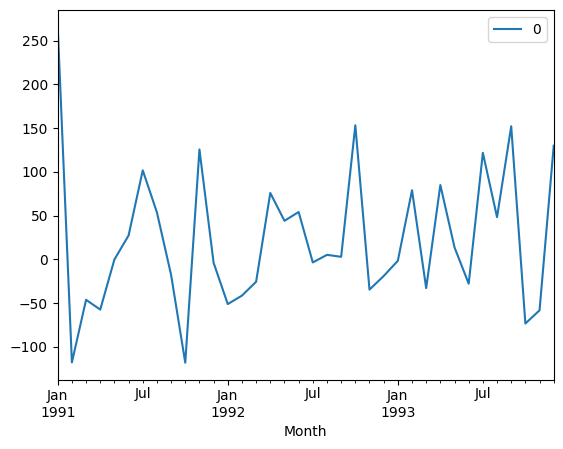

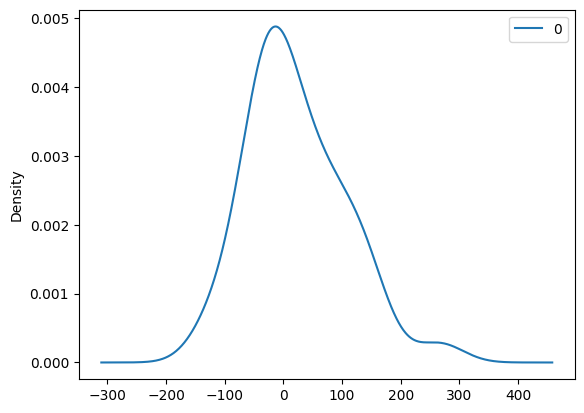

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [9]:
# (1)
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x): # 시간을 표현하는 함수 정의
  return datetime.strptime('199'+x, '%Y-%m') # 날짜시간 > 문자열

series = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0],
                  index_col=0, date_parser=parser)
model = ARIMA(series, order=(5,1,0)) # 함수 호출
model_fit = model.fit() # 디폴트(모델 적용시 디버그 정보 제공되는 기능 비활성화)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid) # 오차정보 저장
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/tmp/ipython-input-701788433.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0],
/tmp/ipython-input-701788433.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))   # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773634, expected=325.900000
predicted=372.070405, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690691, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.819


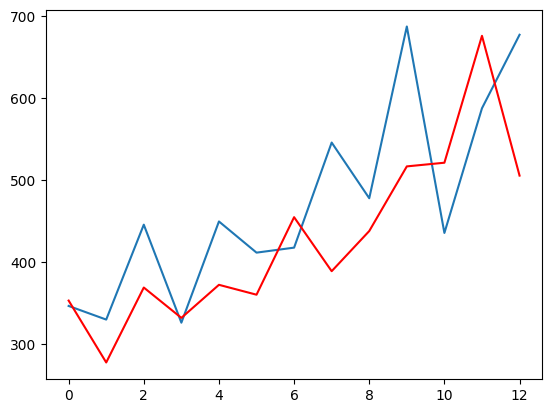

In [10]:
# (2)
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0],
              index_col=0, date_parser=parser)

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]   # train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()
for t in range(len(test)):   # test 데이터셋의 길이(13)만큼 반복하여 수행
    model = ARIMA(history, order=(5, 1, 0))  # ARIMA() 함수 호출
    model_fit = model.fit()
    output = model_fit.forecast()   # forecast() 메서드를 사용하여 예측 수행
    yhat = output[0]   # 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))   # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력

error = mean_squared_error(test, predictions)   # 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



---



💠 다대일 구현 코드 구조화

* 입력과 출력 사이 하나의 RNN 셀만 가지고 있음
* 적층된 구조 가능

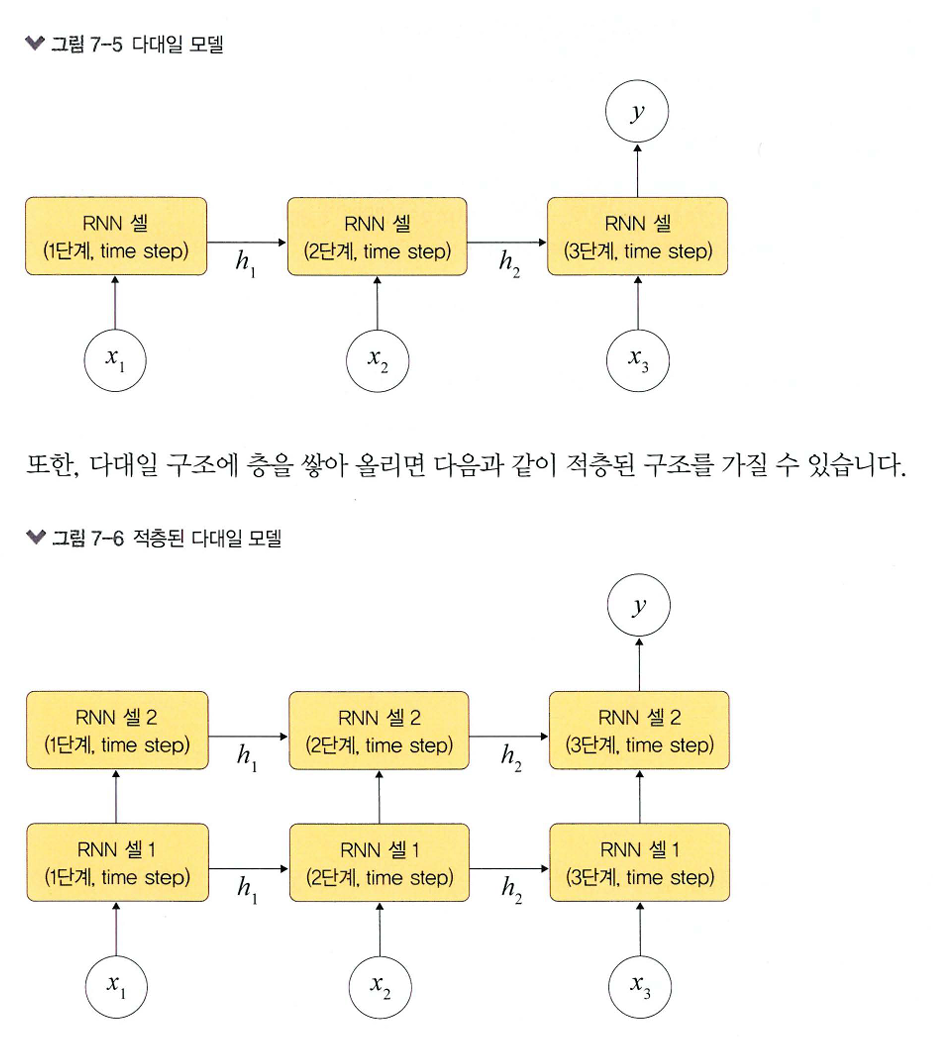

In [ ]:
#self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) ------임베딩 처리
#self. rnn = nn. RNNCell(input_dim, hidden_size) ------ RNN 적용
#self.fc1 = nn.Linear(hidden_size, 256) ------ 완전연결층
#self.fc2 = nn.Linear(256, 3) ------ 출력층

💠 다대다 구현 코드

* In 텐서플로
```
keras.layers.SimpleRNN(100, return_sequences=True, name="RNN")
```

* In 파이토치 - 시퀀스-투-시퀀스 방식
```
Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7855, 256)
    (rnn): LSTM(256, 512, num_layers=2 , dropout=0.5) (dropout): Dropout( p=0 .5, inplace=False))
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)
    (rnn): LSTM(256, 512, num_layers=2 , dropout=0 .5 )
    (fc_out): Linear( in_features=51ι out_features=5893, bias=True )
    (dropout): Dropout( p=0.5 , inplace=False)))
```

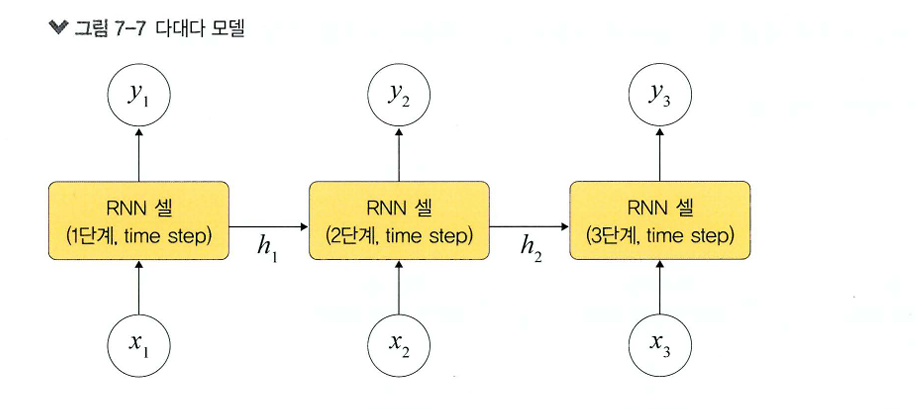

* RNN 구조
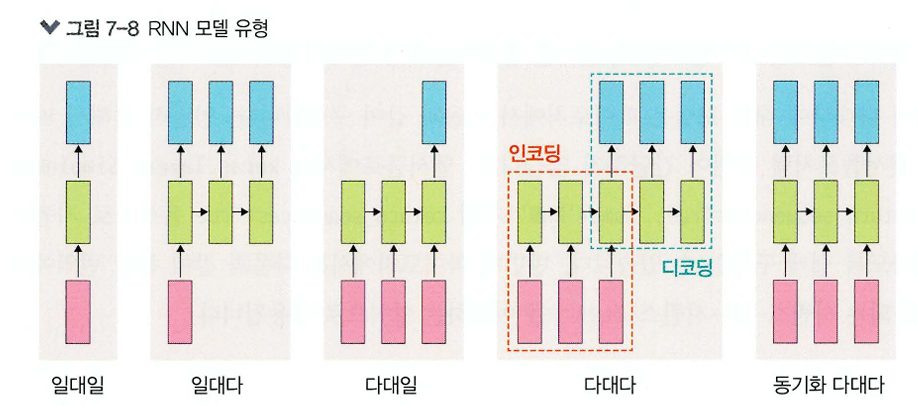



---



## **[RNN 실습 코드]**

### 1. 문자단위 RNN, 다대다 구조

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

> 훈련 데이터 전처리

In [12]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size)) # 문자집합은 중복을 제거한 문자들의 집합

문자 집합의 크기 : 5


In [13]:
# 하이퍼 파라미터 정의
input_size = vocab_size # 입력의 크기는 문자 집합의 크기(원핫벡터를 사용하기 때문)
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [14]:
# 문자 집합에 고유한 정수 부여
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [15]:
# 정수로부터 문자 얻는 코드도 만들기
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [16]:
# 입력, 레이블 데이터의 각 문자들을 정수로 매핑
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [17]:
# 파이토치 nn.RNN()은 기본적으로 3차원 텐서 입력받음
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [18]:
# 원-핫 벡터 변환
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [19]:
# 텐서 변환
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

/tmp/ipython-input-968819066.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  X = torch.FloatTensor(x_one_hot)


In [20]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


> 모델 구현

In [21]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [22]:
net = Net(input_size, hidden_size, output_size) # 클래스로 정의한 모델을 net에 저장

In [23]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


* (1,5,5) - 배치 차원, 시점, 출력크기 > 정확도 측정 시, 모두 펼치서 계산

In [24]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [25]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [26]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [27]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.456216812133789 prediction:  [[2 2 3 2 2]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  eelee
1 loss:  1.2115280628204346 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
2 loss:  0.9671528935432434 prediction:  [[4 4 3 4 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pplp!
3 loss:  0.7101069688796997 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
4 loss:  0.487435519695282 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
5 loss:  0.31844595074653625 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.20624037086963654 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.13383691012859344 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.08698484301567078 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.05733885243535042 prediction:  [[4 4 3 2 0

### 2. 더 많은 데이터 사용 - 문자단위 RNN, 다대다 구조

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

> 훈련 데이터 전처리

In [29]:
# 임의의 샘플 생성
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [30]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [31]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'e': 0, 'y': 1, 'n': 2, 'd': 3, 'f': 4, 'l': 5, 'p': 6, ' ': 7, 'o': 8, 'a': 9, 'h': 10, 'g': 11, ',': 12, 'r': 13, 'm': 14, 't': 15, 'b': 16, '.': 17, 'i': 18, 'c': 19, 'w': 20, 'u': 21, 'k': 22, 's': 23, "'": 24}


In [32]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [33]:
# 하이퍼파라미터 설정
hidden_size = dic_size # 은닉상태크기를 입력크기와 동일하게 설정(달라도됨)
sequence_length = 10  # 10단위로 샘플을 잘라 데이터를 만들기 위함.
learning_rate = 0.1

In [34]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [35]:
print(x_data[0])
print(y_data[0])

[18, 4, 7, 1, 8, 21, 7, 20, 9, 2]
[4, 7, 1, 8, 21, 7, 20, 9, 2, 15]


In [36]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [37]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [38]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,

In [39]:
print(Y[0])

tensor([ 4,  7,  1,  8, 21,  7, 20,  9,  2, 15])


> 모델 구현

In [40]:
# 앞 실습과 거의 동일
# 차이점: 은닉층 2개
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [41]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [42]:
# 비용함수, 옵티마이저 선언
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [43]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [44]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [45]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [46]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

uoooeoooooooooooeooooooooooooooooooooooooooooooooooooooooooooooeooooooooooooooooeoooooooooooooooooooeoooooooooooooooooooooooooooooooooooooooooooeoooooooooooooooooooooooooooooooooo
  oo o o o  o o ooo  o  oo  o  oo  o o  o  oo  o  o o  oo  o oo oo   oo  o oo  o oo  o  oo o oo oo oo  oo  o  o  oo  o ooo  o o oo oo  o oo oo oo  ooo oo  o  oo  oo oo o  o oo oo 
    e    u e ue eet eet ee  eeuoe teue e eeee eeee e e e ue ueeeet,  te u tee eeeut ee  e ue ee e e e eeu eeree e   ee oeeue ueeee eeue ueeel teeut e  ee ue  ee ueu e eteee e e e 
t d d d    t d d d d o        d d         d      d d d d d o d d e  d  d      d     d       d   t    d    d   d d           o   d    d  d     t   d d t     d d      d d d d d d   
t gegngtr  u gtu ututr  otgnu o oot u utu io   u t u h gnutu ior o   utoogto  u u u u u g utu notg uoht u uth wotroot  ro  tu ooo ht utg to   u h eo  u u gnutuo oh  g ututioo u u 
toeoeltooeoeo toioeoeoeoeeeotooeooeotooeoeeoeeeooeooeoeemoeoeeooeeoioteoelaheeeomeoioowoeoeeoeoeooeo